In [164]:
import numpy as np
import torch
import torch.nn.functional as F
print(torch.cuda.is_available())
import matplotlib.pyplot as plt
%matplotlib inline

True


In [165]:
words = open('./names.txt', 'r').read().splitlines()
words[:9]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper']

In [166]:
fucking_huge_word = ''.join(words)
chars = sorted(list(set(fucking_huge_word)))

In [167]:
stoi = {s : i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i : s for s, i in stoi.items()}
print(stoi)
print(itos)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [168]:
block_size = 3
X, Y = [], []
# emma 
# ... => e
# ..e => m
# .em => m
# emm => a
# mma => .
for w in words[:5]:
    w = w + '.'
    context = [0] * block_size
    for ch in w:
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

X, Y = torch.tensor(X), torch.tensor(Y)

In [169]:
# Build embedding matrix and then we gonna tune in the embedding matrix
C = torch.rand((27, 2))
C

tensor([[0.1155, 0.6102],
        [0.4990, 0.9424],
        [0.9326, 0.0268],
        [0.1718, 0.3374],
        [0.4729, 0.3798],
        [0.6443, 0.5647],
        [0.1400, 0.6738],
        [0.9601, 0.2804],
        [0.4017, 0.7037],
        [0.4314, 0.4077],
        [0.8946, 0.5772],
        [0.4084, 0.8274],
        [0.6523, 0.4268],
        [0.3281, 0.3588],
        [0.3595, 0.5337],
        [0.7310, 0.6682],
        [0.1669, 0.2951],
        [0.9258, 0.3876],
        [0.2373, 0.2677],
        [0.5248, 0.3597],
        [0.7314, 0.6706],
        [0.1330, 0.4632],
        [0.5864, 0.7429],
        [0.4953, 0.4058],
        [0.6618, 0.3553],
        [0.4791, 0.3118],
        [0.2735, 0.2778]])

In [170]:
C.shape

torch.Size([27, 2])

In [171]:
C[[0, 1, 2]]

tensor([[0.1155, 0.6102],
        [0.4990, 0.9424],
        [0.9326, 0.0268]])

In [172]:
# we can think this as both the first layer of a huge neural network or a DICTIONARY
C[stoi[itos[5]]] == F.one_hot(torch.tensor(5), num_classes = 27).float() @ C

tensor([True, True])

In [173]:
X.shape

torch.Size([32, 3])

In [174]:
# row 5,6,7
C[[5,6,7]]
C[torch.tensor([5,5,5,5,6])]

tensor([[0.6443, 0.5647],
        [0.6443, 0.5647],
        [0.6443, 0.5647],
        [0.6443, 0.5647],
        [0.1400, 0.6738]])

In [175]:
display(C[X].shape)
display(X.shape)

torch.Size([32, 3, 2])

torch.Size([32, 3])

In [176]:
print(X[3][1])
print(C[X][3][1])
print(C[X[3][1]])

tensor(13)
tensor([0.3281, 0.3588])
tensor([0.3281, 0.3588])


In [177]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [178]:
emb[3] == C[X[3]]

tensor([[True, True],
        [True, True],
        [True, True]])

In [179]:
X[3]

tensor([ 5, 13, 13])

In [180]:
print(C[5])
print(C[13])

tensor([0.6443, 0.5647])
tensor([0.3281, 0.3588])


In [181]:
W1 = torch.randn((2 * 3, 100)) # 2d embedding and 3 of them
b1 = torch.randn(100) # for 100 of them

In [182]:
emb.shape

torch.Size([32, 3, 2])

In [183]:
emb = emb.view(32, -1)
emb.shape

torch.Size([32, 6])

In [184]:
h = emb @ W1 + b1

In [185]:
h

tensor([[ 0.3502, -0.8037,  0.1046,  ...,  2.2583,  0.3492, -1.4503],
        [ 1.9262, -0.1830,  0.1099,  ...,  1.3037,  0.4850, -1.3775],
        [ 0.6585, -0.7783, -0.2079,  ...,  1.7037,  0.5826, -1.0988],
        ...,
        [ 0.2947, -0.1237,  1.1716,  ...,  1.4305,  0.9120, -1.6787],
        [ 1.7896, -0.3736,  0.2908,  ...,  1.5842,  0.1766, -1.4675],
        [ 0.3954, -0.1078,  1.1544,  ...,  1.7465,  0.8680, -1.9891]])

In [186]:
h = torch.tanh(h)

In [187]:
h.untyped_storage()[:1]

 157
[torch.storage.UntypedStorage(device=cpu) of size 1]

In [188]:
h.shape

torch.Size([32, 100])

In [189]:
# 27 characters
w2 = torch.randn((100, 27))
b2 = torch.randn(27)
print(b2.shape)
print(w2.shape)

torch.Size([27])
torch.Size([100, 27])


In [190]:
# 32, 27
# 1, 27
(h @ w2 + b2).shape

torch.Size([32, 27])

In [191]:
logits = h @ w2 + b2

In [192]:
probs = torch.softmax(logits, dim = 1)
probs.shape

torch.Size([32, 27])

In [193]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [194]:
loss = -probs[torch.arange(32), Y].log().mean()
loss

tensor(15.0717)

Lmao quen het nhung gi da tung code roi

In [195]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [196]:
# embedding matrix
C = torch.randn((27, 2))
E = C[X]
# concat step
E_cat = E.view(32, -1) 
w1 = torch.randn((6, 100))
b1 = torch.randn(100)
h = E_cat @ w1 + b1
h = torch.tanh(h)
w2 = torch.randn((100, 27))
b2 = torch.randn(27)
logits = h @ w2 + b2
probs = torch.softmax(logits, dim = 1)

In [197]:
probs.shape

torch.Size([32, 27])

In [198]:
loss = - probs[torch.arange(32), Y].log().mean()
loss

tensor(16.5445)

In [199]:
loss = F.cross_entropy(logits, Y)
loss

tensor(16.5445)

In [200]:
# embedding matrix
C = torch.randn((27, 2))
E = C[X]
# concat step
E_cat = E.view(32, -1) 
w1 = torch.randn((6, 100))
b1 = torch.randn(100)
h = E_cat @ w1 + b1
h = torch.tanh(h)
w2 = torch.randn((100, 27))
b2 = torch.randn(27)
logits = h @ w2 + b2
loss = F.cross_entropy(logits, Y)

In [201]:
block_size = 3
X, Y = [], []
# emma 
# ... => e
# ..e => m
# .em => m
# emm => a
# mma => .
for w in words:
    w = w + '.'
    context = [0] * block_size
    for ch in w:
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

X, Y = torch.tensor(X), torch.tensor(Y)

In [202]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [203]:
C = torch.randn((27, 2), requires_grad=True)
w1 = torch.randn((6, 300), requires_grad=True)
b1 = torch.randn(100, requires_grad=True)
w2 = torch.randn((100, 27), requires_grad=True)
b2 = torch.randn(27, requires_grad=True)
lr = 0.01
paramets = [C, w1, b1, w2, b2]

In [204]:
for p in paramets:
    p.requires_grad = True

In [205]:
lre = 10 ** torch.linspace(-3, 0, 1000)
lre

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [206]:
lri = []
lossi = []
for i in range(1000):
    ix = torch.randint(1, X.shape[0], (32, ))
    E = C[X[ix]]
    E_cat = E.view(ix.shape[0], -1)
    h = torch.tanh(E_cat @ w1 + b1)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    # backward
    for p in paramets:
        p.grad = None
        
    loss.backward()
    # forward pass
    for p in paramets:
        p.data -= 0.001 * p.grad
print(loss.item())

RuntimeError: The size of tensor a (300) must match the size of tensor b (100) at non-singleton dimension 1

In [ ]:
logits.max(dim = 1)

torch.return_types.max(
values=tensor([11.9339,  4.9881, 10.6721,  9.5823,  5.5438,  9.9059, 10.0798,  8.0671,
         8.0671,  8.2651, 12.6922,  8.5463,  8.1610,  6.7702,  7.7726, 22.6047,
         6.7232, 12.4589, 20.6809, 12.2631,  9.9957,  9.3701, 14.9758, 13.4416,
         5.9680,  7.9350,  8.0671, 12.9334, 20.1009,  9.5563,  8.0671,  8.4549],
       grad_fn=<MaxBackward0>),
indices=tensor([ 4,  0, 20,  4, 13,  5,  5,  1,  1,  5,  0, 23, 13, 14,  7,  9, 22, 14,
        15, 11,  1, 25, 26, 14, 16, 25,  1,  2,  9,  7,  1,  6]))

In [ ]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [ ]:
E = C[X]
E_cat = E.view(X.shape[0], -1)
h = torch.tanh(E_cat @ w1 + b1)
logits = h @ w2 + b2
loss = F.cross_entropy(logits, Y)
print(loss)

tensor(10.2685, grad_fn=<NllLossBackward0>)


In [ ]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    # emma 
    # ... => e
    # ..e => m
    # .em => m
    # emm => a
    # mma => .
    for w in words:
        w = w + '.'
        context = [0] * block_size
        for ch in w:
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X, Y = torch.tensor(X), torch.tensor(Y)
    return X, Y

In [ ]:
import random
random.seed = 42
random.shuffle(words)

In [ ]:
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))
print(n1, n2)

25626 28829


In [ ]:
X_train, Y_train = build_dataset(words[:n1])
X_val, Y_val = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[:n1])

In [ ]:
C = torch.randn((27, 10), requires_grad=True)
w1 = torch.randn((30, 300), requires_grad=True)
b1 = torch.randn(300, requires_grad=True)
w2 = torch.randn((300, 27), requires_grad=True)
b2 = torch.randn(27, requires_grad=True)
lr = 0.01
stepi = []
lossi = []

paramets = [C, w1, b1, w2, b2]

In [ ]:
for i in range(1000):
    ix = torch.randint(1, X_train.shape[0], (32, ))
    E = C[X[ix]]
    E_cat = E.view(ix.shape[0], -1)
    h = torch.tanh(E_cat @ w1 + b1)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])
    # backward
    for p in paramets:
        p.grad = None
    
    stepi.append(i)
    lossi.append(loss.log10().item())
    loss.backward()
    # forward pass
    for p in paramets:
        p.data -= 0.01 * p.grad
print(loss.item())

8.056496620178223


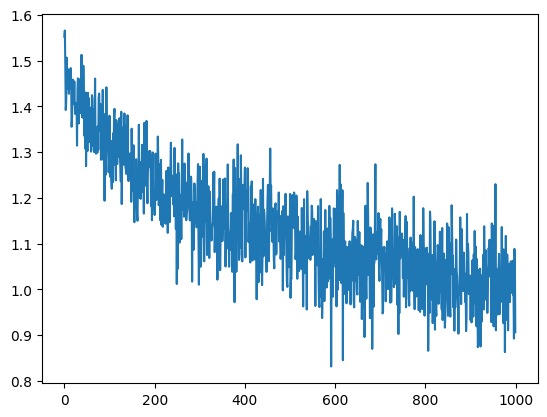

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
E = C[X_val]
E_cat = E.view(X_val.shape[0], -1)
h = torch.tanh(E_cat @ w1 + b1)
logits = h @ w2 + b2
loss = F.cross_entropy(logits, Y_val)
print(loss)

tensor(9.7086, grad_fn=<NllLossBackward0>)


In [ ]:
context = [0] * block_size
print(C[torch.tensor(context)])

tensor([[ 1.6801, -0.8435, -1.8790,  0.3666,  1.8159,  0.1760, -1.5746, -1.8805,
         -1.1166, -0.9433],
        [ 1.6801, -0.8435, -1.8790,  0.3666,  1.8159,  0.1760, -1.5746, -1.8805,
         -1.1166, -0.9433],
        [ 1.6801, -0.8435, -1.8790,  0.3666,  1.8159,  0.1760, -1.5746, -1.8805,
         -1.1166, -0.9433]], grad_fn=<IndexBackward0>)


In [ ]:
w1.shape

torch.Size([30, 300])

In [ ]:
for _ in range(20):
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ w1 + b1)
      logits = h @ w2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

eryar.
mnaalrln.
vg.
.
rskyo.
emnrqtbjlssydevaenlstn.
itaaa.
.
rerleeeamoatqsahrlvrqtodswnal.
.
shecoygady.
ieadjatinenipeyxoev.
oon.
.
emn.
d.
.
.
y.
dlntank.
